In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('./FIFA18_players_database/clean_data.csv')
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,69,60,60,68,54,48,58,41,58,30,...,55,43,57,67,48,58,58,46,36,RB
1,43,65,61,57,57,58,42,37,48,55,...,65,58,57,53,71,63,84,61,49,CDM
2,62,65,59,68,59,46,36,37,54,49,...,64,52,58,59,61,62,71,52,33,CDM
3,73,77,76,77,75,73,75,75,75,61,...,77,83,70,70,75,72,70,67,69,RB
4,73,69,66,57,74,74,76,74,74,46,...,73,74,76,78,76,77,74,64,57,RB


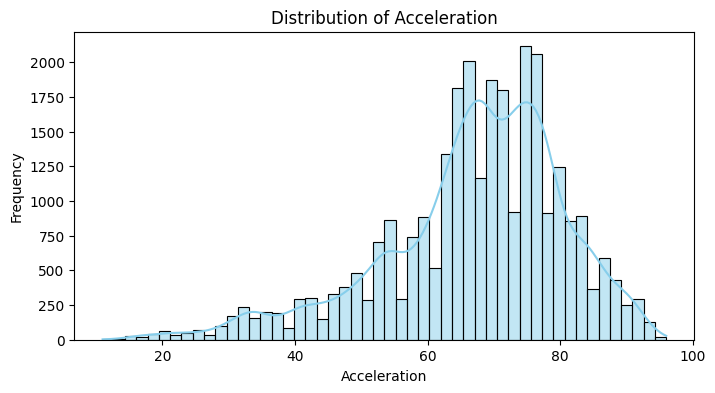

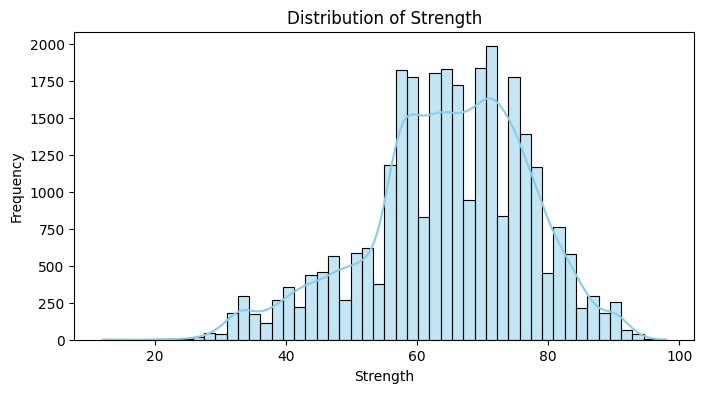

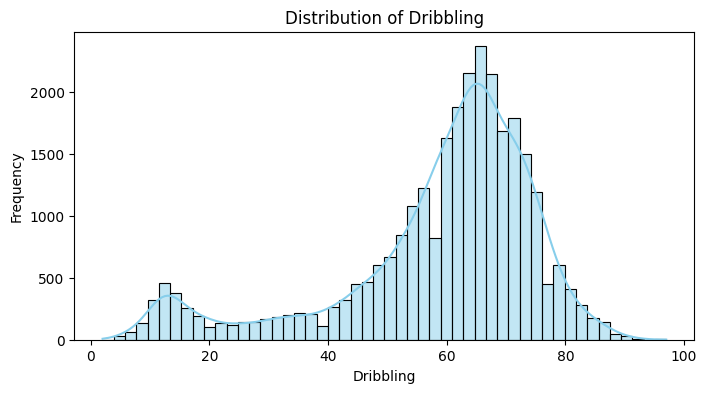

In [77]:
columns_to_plot = ['Acceleration', 'Strength', 'Dribbling']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [78]:
unique_positions = df['Preferred Positions'].unique()
unique_positions

array(['RB', 'CDM', 'GK', 'LM', 'LW', 'CAM', 'CB', 'RM', 'ST', 'RW', 'CM',
       'CF', 'LB', 'RWB', 'LWB'], dtype=object)

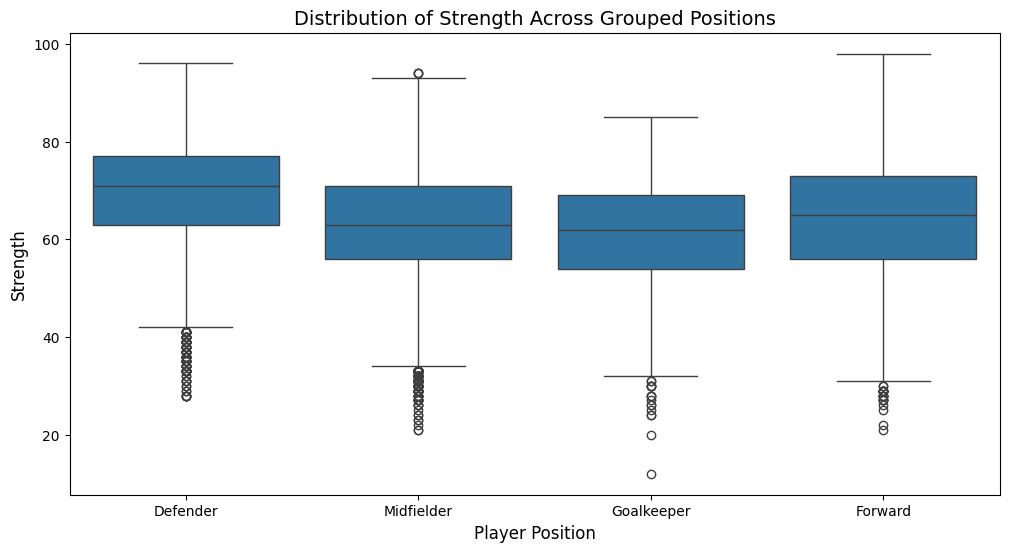

In [79]:
position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
    'GK': 'Goalkeeper'
}


df['Grouped Positions'] = df['Preferred Positions'].map(position_mapping)

# Gör en box plot för de grupperade positionerna
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Grouped Positions', y='Strength')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Distribution of Strength Across Grouped Positions', fontsize=14)
plt.show()


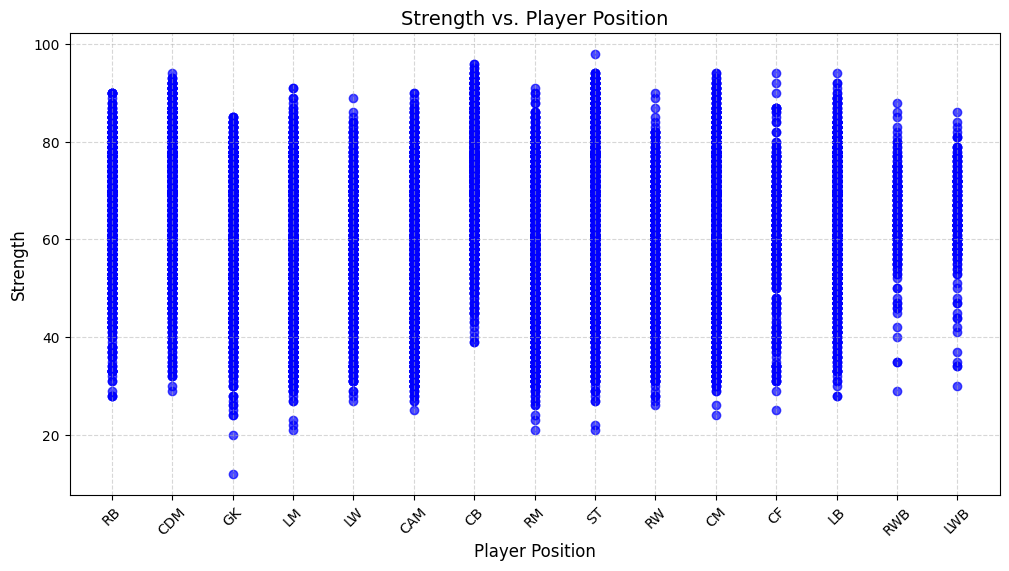

In [80]:
# Trying out scatter plotting
plt.figure(figsize=(12, 6))
positions = df['Preferred Positions']  # X-axel
strength = df['Strength']  # Y-axel

plt.scatter(positions, strength, alpha=0.7, color='blue')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Strength vs. Player Position', fontsize=14)
plt.xticks(rotation=45)  # Rotate X labels, better read ability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can clearly see that Strength is a clear attribute for defensive positions.

In [83]:
df.iloc[:, -1] 

0          Defender
1        Midfielder
2        Midfielder
3          Defender
4          Defender
            ...    
28811      Defender
28812    Midfielder
28813      Defender
28814    Midfielder
28815       Forward
Name: Grouped Positions, Length: 28816, dtype: object